## MNIST

In [ ]:
!python LL_hist.py --netG './mnist_mle_ckpt/netG_epoch_99.pth' --filename 'mnist_mle.png'

In [ ]:
!python LL_hist.py --netG './mnist_hybrid_ckpt/netG_epoch_87.pth' --filename 'mnist_hybrid.png'

In [ ]:
!python LL_hist.py --netG './mnist_adv_flowgan_marin/netG_epoch_99.pth' --filename 'mnist_adv.png'

## FMNIST

In [ ]:
!python LL_hist.py --netG './mnist_adv_flowgan_marin/netG_epoch_99.pth'\
--filename 'fmnist_adv.png'\
--dataset 'fmnist'

In [ ]:
!python LL_hist.py --netG './mnist_hybrid_ckpt/netG_epoch_87.pth'\
--filename 'fmnist_hybrid.png'\
--dataset 'fmnist'

In [ ]:
!python LL_hist.py --netG './mnist_mle_ckpt/netG_epoch_99.pth'\
--filename 'fmnist_mle.png'\
--dataset 'fmnist'

## Subplot results

In [ ]:
import sys
from PIL import Image

images = [Image.open(x) for x in ['LL_hist/mnist_mle.png', 'LL_hist/mnist_hybrid.png', 'LL_hist/mnist_adv.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save('mnist.jpg')

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
df

,mnist_mle,fmnist_mle
0,2227.188477,6548.546387
1,2320.613281,9695.577148
2,2206.685547,5954.200684
3,2204.521484,7310.071777
4,2074.961914,7413.991699
...,...,...
9995,1993.718262,6462.145508
9996,2328.995605,8767.578125
9997,2101.460449,6598.847656
9998,2146.204590,6812.542480


<AxesSubplot:ylabel='Count'>

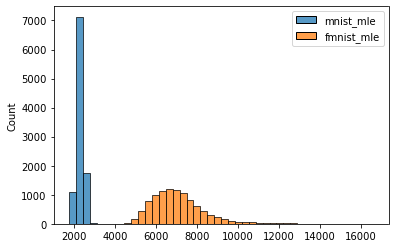

In [2]:
m = np.expand_dims(np.load('LL_hist/mnist_mle.npy'), axis=0).T
f = np.expand_dims(np.load('LL_hist/fmnist_mle.npy'), axis=0).T

df = pd.DataFrame(np.concatenate((m, f), axis=1), columns=["mnist_mle", "fmnist_mle"])
sns.histplot(data=df)

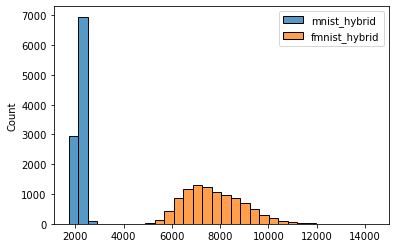

In [10]:
m = np.expand_dims(np.load('LL_hist/mnist_hybrid.npy'), axis=0).T
f = np.expand_dims(np.load('LL_hist/fmnist_hybrid.npy'), axis=0).T

df = pd.DataFrame(np.concatenate((m, f), axis=1), columns=["mnist_hybrid", "fmnist_hybrid"])
sns.histplot(data=df)

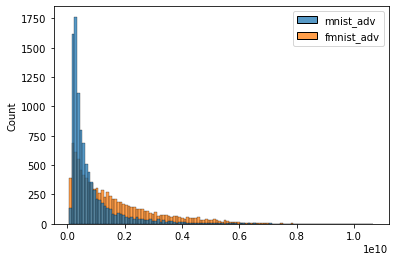

In [12]:
m = np.expand_dims(np.load('LL_hist/mnist_adv.npy'), axis=0).T
f = np.expand_dims(np.load('LL_hist/fmnist_adv.npy'), axis=0).T

df = pd.DataFrame(np.concatenate((m, f), axis=1), columns=["mnist_adv", "fmnist_adv"])
sns.histplot(data=df)